<a href="https://colab.research.google.com/github/AnubhvaMaity/Banking/blob/main/INDIAN_BANK_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Banking Customer Data Cleaning & Quality Analysis

In [ ]:
#Import Libraries & Load Data
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("indian_bank_customers_10000_enhanced.csv")

# View basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 10200 non-null  object 
 1   Name                      10200 non-null  object 
 2   Age                       10200 non-null  int64  
 3   State                     10200 non-null  object 
 4   City                      10200 non-null  object 
 5   Location ID               10200 non-null  int64  
 6   Joined Bank               10200 non-null  object 
 7   Banking Contact           10200 non-null  object 
 8   Nationality               10200 non-null  object 
 9   Occupation                9691 non-null   object 
 10  Fee Structure             10200 non-null  object 
 11  Loyalty Classification    10200 non-null  object 
 12  Estimated Income          9691 non-null   float64
 13  Superannuation Savings    10200 non-null  float64
 14  Amount

,Client ID,Name,Age,State,City,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND10000,Rahul Sharma,25,Telangana,Warangal,30256,18-02-2008,Suresh Iyer,Indian,Data Analyst,...,1630759.32,1953154.47,2184316.51,110220.31,3535594.10,0,1,2,1,4
1,IND10001,Sneha Singh,50,Karnataka,Bengaluru,45118,18-04-2007,Rohit Das,Indian,Data Analyst,...,3059348.30,1660601.49,3319324.61,309259.88,5170241.40,4,2,2,2,1
2,IND10002,Amit Patel,22,Gujarat,Surat,31512,08-06-2024,Suresh Das,Indian,Bank Officer,...,617649.95,1908585.08,2141218.11,122405.46,2773561.27,2,3,5,1,2
3,IND10003,Sneha Sharma,50,Karnataka,Bengaluru,42347,31-12-2013,Kunal Verma,Indian,NaN,...,5972662.41,1621542.10,2990585.11,214216.91,3501197.55,2,4,2,2,2
4,IND10004,Kunal Mehta,50,Maharashtra,Mumbai,15371,06-06-2008,Ankit Das,Indian,Data Analyst,...,141274.12,2164958.24,2730024.37,268485.17,1600951.14,5,5,3,1,1


In [ ]:
#Detect NULL Values
# Count missing values
null_values = df.isnull().sum()

# Display only columns with missing data
null_values[null_values > 0]


,0
Occupation,509
Estimated Income,509
Credit Card Balance,514
Business Lending,507


In [ ]:
#Handle Missing Income & Occupation
df["Estimated Income"].fillna(df["Estimated Income"].median(), inplace=True)


/tmp/ipython-input-2664195054.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Estimated Income"].fillna(df["Estimated Income"].median(), inplace=True)


In [ ]:
#Handle Occupation (Categorical)
df["Occupation"].fillna("Unknown", inplace=True)


/tmp/ipython-input-2611276123.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Occupation"].fillna("Unknown", inplace=True)


In [ ]:
#Remove Duplicate Rows
# Check duplicates
df.duplicated().sum()


np.int64(200)

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Confirm
df.duplicated().sum()


np.int64(0)

In [ ]:
#Validate Age Range
#Valid age range: 18 to 100
df = df[(df["Age"] >= 18) & (df["Age"] <= 100)]


In [ ]:
#Validate Financial Ranges
#Financial values must be non-negative
financial_columns = [
    "Estimated Income",
    "Credit Card Balance",
    "Bank Loans",
    "Bank Deposits",
    "Business Lending"
]

for col in financial_columns:
    df = df[df[col] >= 0]


In [ ]:
df.shape


(9023, 27)

In [ ]:
df.isnull().sum()


,0
Client ID,0
Name,0
Age,0
State,0
City,0
Location ID,0
Joined Bank,0
Banking Contact,0
Nationality,0
Occupation,0


In [ ]:
df.describe()


,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,9023.000000,9023.000000,9.023000e+03,9023.000000,9023.000000,9023.000000,9.023000e+03,9.023000e+03,9.023000e+03,9.023000e+03,9023.000000,9.023000e+03,9023.000000,9023.000000,9023.000000,9023.000000,9023.000000
mean,35.189516,49876.901806,7.247295e+05,155276.373757,1.989471,74769.882453,2.501420e+06,4.060349e+06,1.501770e+06,2.012315e+06,250466.527408,2.991075e+06,2.494403,2.995789,3.008755,1.500055,3.006539
std,9.568940,28583.315915,2.673447e+05,83164.163549,1.415702,43463.768898,1.449581e+06,2.289531e+06,8.699126e+05,1.147513e+06,144150.357485,1.729885e+06,1.715444,1.411226,1.412579,0.500028,1.417291
min,22.000000,1005.000000,2.500339e+05,10012.730000,0.000000,4.240000,4.067600e+02,5.092651e+04,1.039765e+04,1.037194e+04,46.170000,2.618800e+02,0.000000,1.000000,1.000000,1.000000,1.000000
25%,25.000000,25373.000000,5.010067e+05,83258.460000,1.000000,37120.510000,1.240358e+06,2.097550e+06,7.466305e+05,1.006089e+06,126918.975000,1.512466e+06,1.000000,2.000000,2.000000,1.000000,2.000000
50%,35.000000,49818.000000,7.201580e+05,155463.030000,2.000000,75075.640000,2.491007e+06,4.059920e+06,1.494927e+06,2.032103e+06,250676.120000,2.972965e+06,2.000000,3.000000,3.000000,2.000000,3.000000
75%,45.000000,74243.500000,9.520820e+05,226331.980000,3.000000,112361.365000,3.741127e+06,6.068402e+06,2.250049e+06,2.988394e+06,374664.585000,4.476164e+06,4.000000,4.000000,4.000000,2.000000,4.000000
max,50.000000,99997.000000,1.199902e+06,299996.770000,4.000000,149995.400000,4.999474e+06,7.999192e+06,2.999915e+06,3.999991e+06,499866.860000,5.998607e+06,5.000000,5.000000,5.000000,2.000000,5.000000


In [ ]:
#Customer Segmentation Analysis

In [ ]:
#Grouping for Segmentation
# Group by Loyalty Classification
loyalty_income = df.groupby("Loyalty Classification")["Estimated Income"].mean()

# Group by Risk Weighting
risk_income = df.groupby("Risk Weighting")["Estimated Income"].mean()

# Group by Gender
gender_income = df.groupby("GenderId")["Estimated Income"].mean()

# Group by State
state_income = df.groupby("State")["Estimated Income"].mean()


In [ ]:
#Identify Customer Segments
high_value_customers = df[
    (df["Estimated Income"] > df["Estimated Income"].quantile(0.75)) &
    (df["Loyalty Classification"].str.contains("Gold|Platinum|Jade", case=False, na=False))
]

high_value_customers.shape


(1701, 27)

In [ ]:
#Risky Customers
risky_customers = df[
    df["Risk Weighting"] > df["Risk Weighting"].quantile(0.75)
]

risky_customers.shape


(1783, 27)

In [ ]:
#Low-Profit Customers
low_profit_customers = df[
    (df["Estimated Income"] < df["Estimated Income"].quantile(0.25)) &
    (df["Bank Deposits"] < df["Bank Deposits"].quantile(0.25))
]

low_profit_customers.shape


(559, 27)

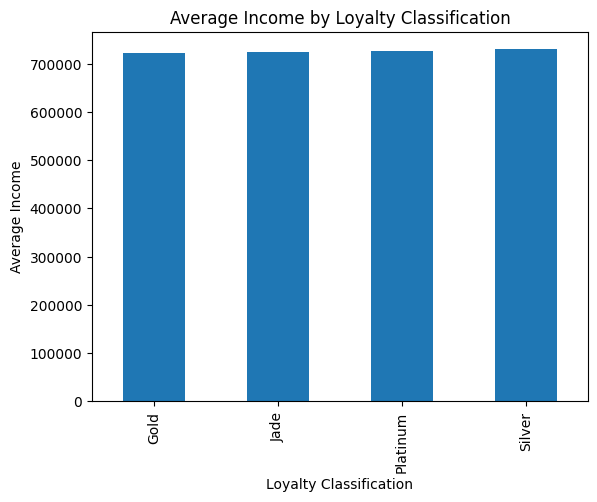

In [ ]:
#Bar Chart – Income by Loyalty
import matplotlib.pyplot as plt
plt.figure()
loyalty_income.plot(kind="bar")
plt.title("Average Income by Loyalty Classification")
plt.xlabel("Loyalty Classification")
plt.ylabel("Average Income")
plt.show()

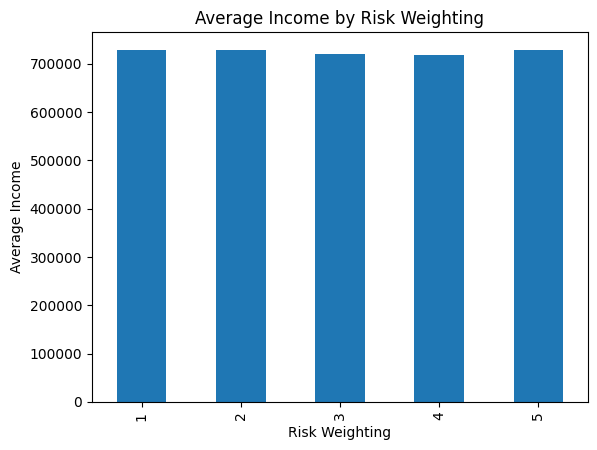

In [ ]:
#Bar Chart – Income by Risk
plt.figure()
risk_income.plot(kind="bar")
plt.title("Average Income by Risk Weighting")
plt.xlabel("Risk Weighting")
plt.ylabel("Average Income")
plt.show()


<Figure size 640x480 with 0 Axes>

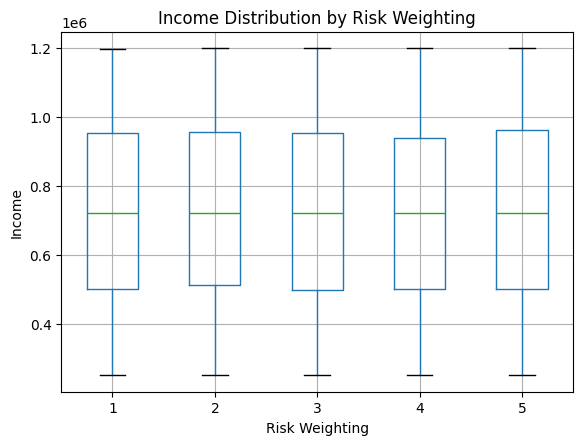

In [ ]:
#Box Plot – Income vs Risk
plt.figure()
df.boxplot(column="Estimated Income", by="Risk Weighting")
plt.title("Income Distribution by Risk Weighting")
plt.suptitle("")
plt.xlabel("Risk Weighting")
plt.ylabel("Income")
plt.show()


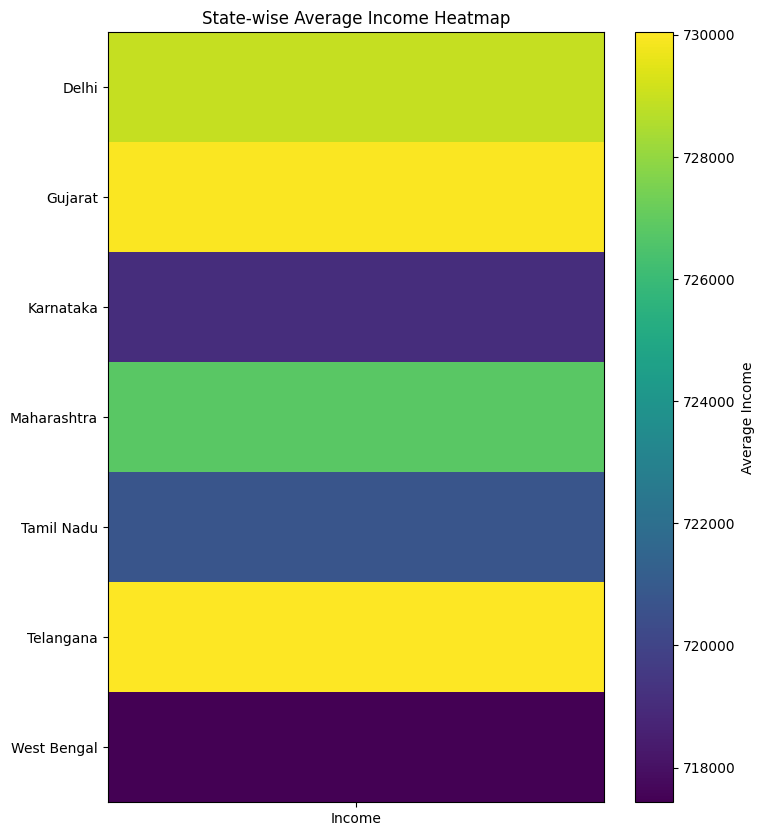

In [ ]:
#State-wise Income Heatmap
state_income_df = df.pivot_table(
    values="Estimated Income",
    index="State",
    aggfunc="mean"
)

plt.figure(figsize=(8, 10))
plt.imshow(state_income_df, aspect="auto")
plt.colorbar(label="Average Income")
plt.yticks(range(len(state_income_df.index)), state_income_df.index)
plt.xticks([0], ["Income"])
plt.title("State-wise Average Income Heatmap")
plt.show()


In [ ]:
#3. Credit Risk Analysis Project

In [ ]:
#Basic Overview
df[["Estimated Income", "Bank Loans", "Credit Card Balance", "Risk Weighting", "Properties Owned"]].describe()


,Estimated Income,Bank Loans,Credit Card Balance,Risk Weighting,Properties Owned
count,9.023000e+03,9.023000e+03,9023.000000,9023.000000,9023.000000
mean,7.247295e+05,2.501420e+06,74769.882453,2.995789,2.494403
std,2.673447e+05,1.449581e+06,43463.768898,1.411226,1.715444
min,2.500339e+05,4.067600e+02,4.240000,1.000000,0.000000
25%,5.010067e+05,1.240358e+06,37120.510000,2.000000,1.000000
50%,7.201580e+05,2.491007e+06,75075.640000,3.000000,2.000000
75%,9.520820e+05,3.741127e+06,112361.365000,4.000000,4.000000
max,1.199902e+06,4.999474e+06,149995.400000,5.000000,5.000000


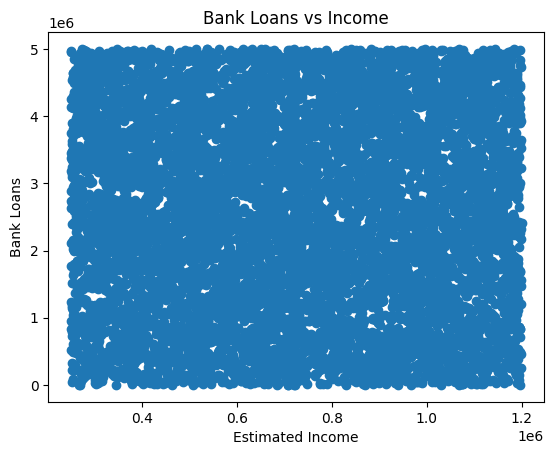

In [ ]:
#Compare Bank Loans vs Income (Scatter Plot)
plt.figure()
plt.scatter(df["Estimated Income"], df["Bank Loans"])
plt.xlabel("Estimated Income")
plt.ylabel("Bank Loans")
plt.title("Bank Loans vs Income")
plt.show()


<Figure size 640x480 with 0 Axes>

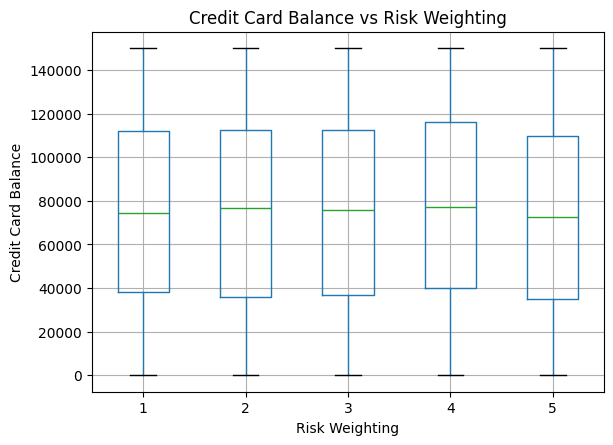

In [ ]:
#Compare Credit Card Balance vs Risk Weighting
plt.figure()
df.boxplot(column="Credit Card Balance", by="Risk Weighting")
plt.title("Credit Card Balance vs Risk Weighting")
plt.suptitle("")
plt.xlabel("Risk Weighting")
plt.ylabel("Credit Card Balance")
plt.show()


In [ ]:
#Identify Red Flag – High Loans + Low Income
#Rule
#Income < 25th percentile
#Loans > 75th percentile
low_income_threshold = df["Estimated Income"].quantile(0.25)
high_loan_threshold = df["Bank Loans"].quantile(0.75)

high_risk_loans = df[
    (df["Estimated Income"] < low_income_threshold) &
    (df["Bank Loans"] > high_loan_threshold)
]

high_risk_loans.shape


(544, 27)

In [ ]:
#Identify Red Flag – Multiple Properties + High Debt
#Rule
#Properties Owned ≥ 2
#Bank Loans in top 25%
high_debt_properties = df[
    (df["Properties Owned"] >= 2) &
    (df["Bank Loans"] > high_loan_threshold)
]

high_debt_properties.shape


(1528, 27)

In [ ]:
#Risk Category Summary
risk_summary = {
    "High Loan + Low Income Customers": high_risk_loans.shape[0],
    "Multiple Properties + High Debt Customers": high_debt_properties.shape[0]
}

risk_summary


{'High Loan + Low Income Customers': 544,
 'Multiple Properties + High Debt Customers': 1528}

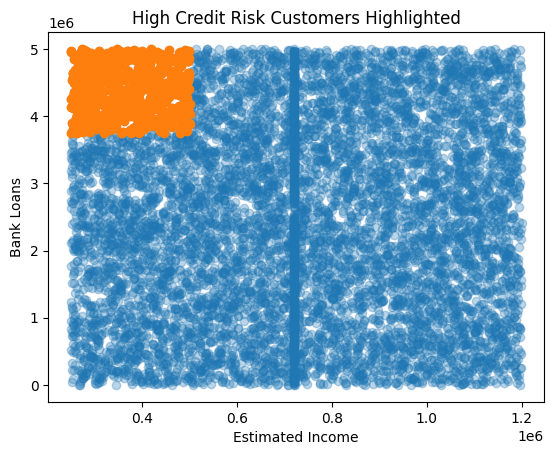

In [ ]:
#Visualize Red Flag Customers (Loans vs Income)
plt.figure()
plt.scatter(df["Estimated Income"], df["Bank Loans"], alpha=0.3)
plt.scatter(high_risk_loans["Estimated Income"], high_risk_loans["Bank Loans"])
plt.xlabel("Estimated Income")
plt.ylabel("Bank Loans")
plt.title("High Credit Risk Customers Highlighted")
plt.show()


In [ ]:
#4. State & City-wise Banking Performance Dashboard

In [ ]:
#State-wise Banking Performance (Aggregates)
state_performance = df.groupby("State").agg(
    Total_Deposits=("Bank Deposits", "sum"),
    Total_Loans=("Bank Loans", "sum"),
    Total_Business_Lending=("Business Lending", "sum")
).reset_index()

state_performance


,State,Total_Deposits,Total_Loans,Total_Business_Lending
0,Delhi,5.339290e+09,3.280815e+09,3.895596e+09
1,Gujarat,5.244240e+09,3.171333e+09,3.858419e+09
2,Karnataka,5.324503e+09,3.344602e+09,3.971023e+09
3,Maharashtra,5.469949e+09,3.306488e+09,3.902336e+09
4,Tamil Nadu,4.976648e+09,3.130791e+09,3.820135e+09
5,Telangana,5.244996e+09,3.124087e+09,3.793945e+09
6,West Bengal,5.036906e+09,3.212200e+09,3.747017e+09


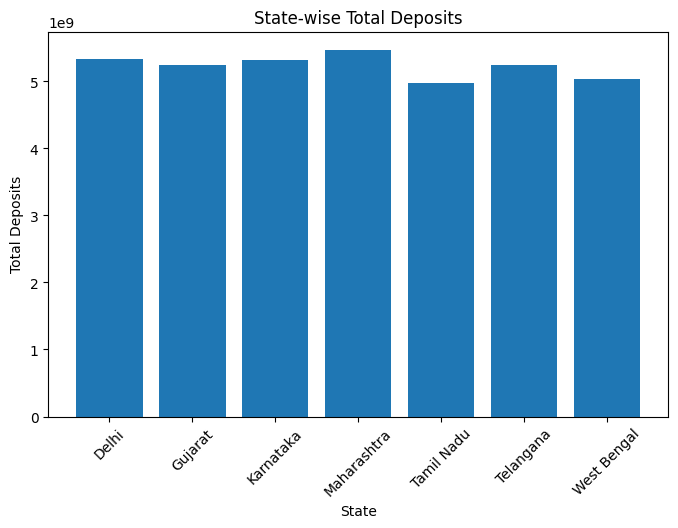

In [ ]:
#State-wise Deposits (Bar Chart)
plt.figure(figsize=(8,5))
plt.bar(state_performance["State"], state_performance["Total_Deposits"])
plt.title("State-wise Total Deposits")
plt.xlabel("State")
plt.ylabel("Total Deposits")
plt.xticks(rotation=45)
plt.show()


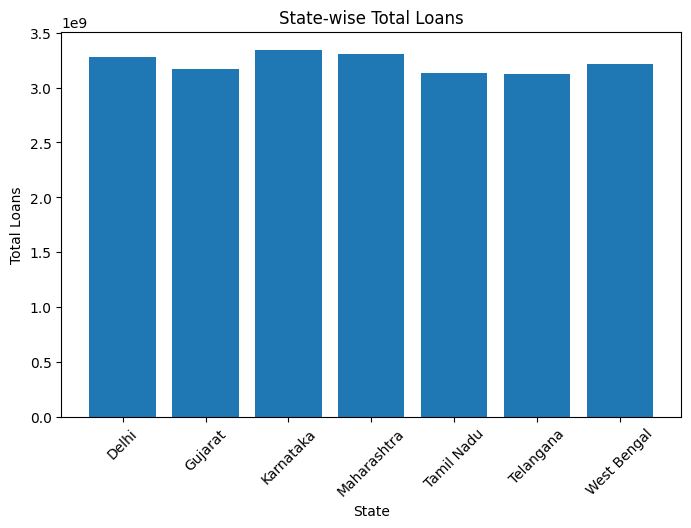

In [ ]:
#State-wise Loans (Bar Chart)
plt.figure(figsize=(8,5))
plt.bar(state_performance["State"], state_performance["Total_Loans"])
plt.title("State-wise Total Loans")
plt.xlabel("State")
plt.ylabel("Total Loans")
plt.xticks(rotation=45)
plt.show()


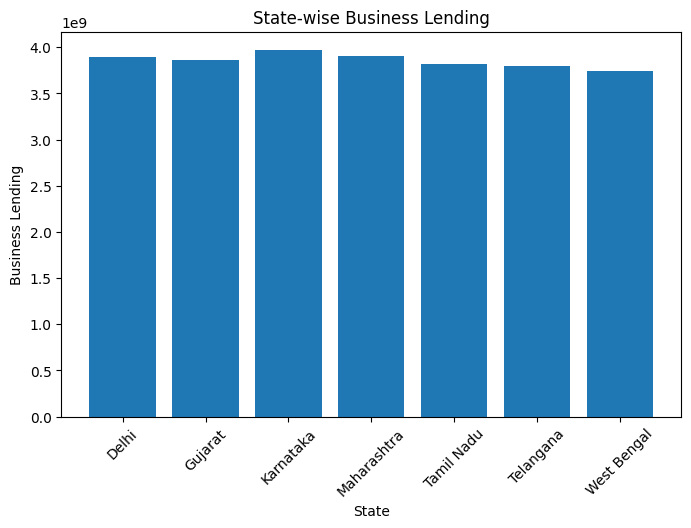

In [ ]:
#State-wise Business Lending (Bar Chart)
plt.figure(figsize=(8,5))
plt.bar(state_performance["State"], state_performance["Total_Business_Lending"])
plt.title("State-wise Business Lending")
plt.xlabel("State")
plt.ylabel("Business Lending")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#City-wise Banking Performance
city_performance = df.groupby("City").agg(
    Customer_Count=("Client ID", "count"),
    Average_Income=("Estimated Income", "mean")
).reset_index()

city_performance.head()


,City,Customer_Count,Average_Income
0,Ahmedabad,419,731267.461671
1,Bengaluru,470,713461.041255
2,Chennai,421,725463.629620
3,Coimbatore,410,731697.353927
4,Howrah,616,706661.363458


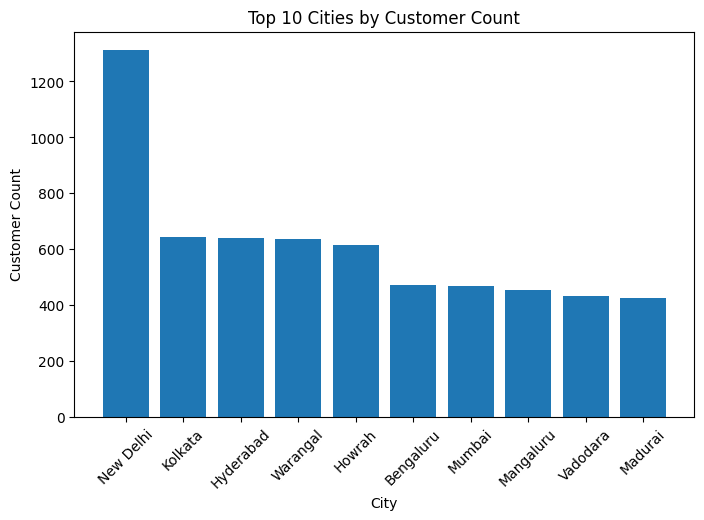

In [ ]:
#City-wise Customer Count (Top 10 Cities)
top_cities_customers = city_performance.sort_values(
    by="Customer_Count", ascending=False
).head(10)

plt.figure(figsize=(8,5))
plt.bar(top_cities_customers["City"], top_cities_customers["Customer_Count"])
plt.title("Top 10 Cities by Customer Count")
plt.xlabel("City")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.show()


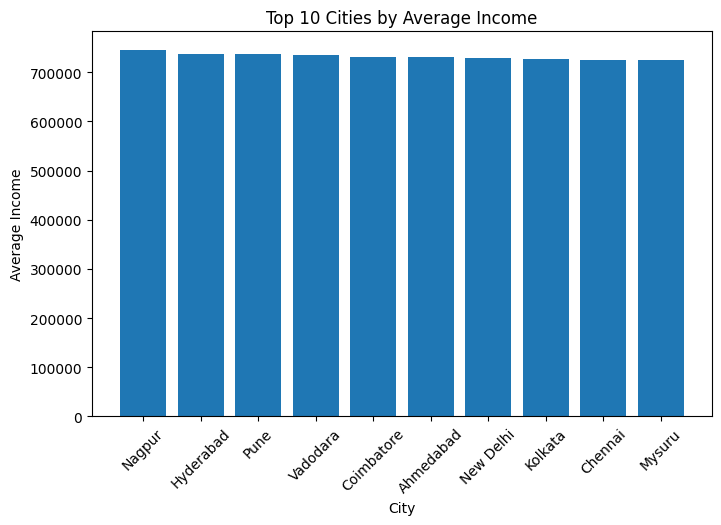

In [ ]:
#City-wise Average Income (Top 10 Cities)
top_cities_income = city_performance.sort_values(
    by="Average_Income", ascending=False
).head(10)

plt.figure(figsize=(8,5))
plt.bar(top_cities_income["City"], top_cities_income["Average_Income"])
plt.title("Top 10 Cities by Average Income")
plt.xlabel("City")
plt.ylabel("Average Income")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Dashboard Summary Tables
state_performance.sort_values("Total_Deposits", ascending=False)


,State,Total_Deposits,Total_Loans,Total_Business_Lending
3,Maharashtra,5.469949e+09,3.306488e+09,3.902336e+09
0,Delhi,5.339290e+09,3.280815e+09,3.895596e+09
2,Karnataka,5.324503e+09,3.344602e+09,3.971023e+09
5,Telangana,5.244996e+09,3.124087e+09,3.793945e+09
1,Gujarat,5.244240e+09,3.171333e+09,3.858419e+09
6,West Bengal,5.036906e+09,3.212200e+09,3.747017e+09
4,Tamil Nadu,4.976648e+09,3.130791e+09,3.820135e+09


In [ ]:
city_performance.sort_values("Customer_Count", ascending=False)


,City,Customer_Count,Average_Income
12,New Delhi,1313,728922.761371
6,Kolkata,642,727764.025483
5,Hyderabad,640,736812.303750
16,Warangal,636,723230.902626
4,Howrah,616,706661.363458
1,Bengaluru,470,713461.041255
9,Mumbai,466,700787.971137
8,Mangaluru,454,719438.738458
15,Vadodara,433,735476.705104
7,Madurai,426,705559.310164


In [ ]:
#5.Bank Revenue Performance Dashboard

In [ ]:
#Convert Date Column (For Monthly Trend)
df["Joined Bank"] = pd.to_datetime(df["Joined Bank"], errors="coerce")
df["YearMonth"] = df["Joined Bank"].dt.to_period("M")


/tmp/ipython-input-2393148261.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Joined Bank"] = pd.to_datetime(df["Joined Bank"], errors="coerce")


In [ ]:
#KPI Calculations (Revenue Sources)
total_deposits = df["Bank Deposits"].sum()
total_loans = df["Bank Loans"].sum()
total_business_lending = df["Business Lending"].sum()
total_credit_card_outstanding = df["Credit Card Balance"].sum()

total_deposits, total_loans, total_business_lending, total_credit_card_outstanding


(np.float64(36636531625.63),
 np.float64(22570315862.539997),
 np.float64(26988470470.24),
 np.float64(674648649.37))

In [ ]:
#KPI Cards (Text-Based Dashboard)
print("BANK REVENUE KPIs")
print("------------------")
print(f"Total Bank Deposits           : {total_deposits:,.2f}")
print(f"Total Bank Loans              : {total_loans:,.2f}")
print(f"Total Business Lending        : {total_business_lending:,.2f}")
print(f"Total Credit Card Outstanding : {total_credit_card_outstanding:,.2f}")


BANK REVENUE KPIs
------------------
Total Bank Deposits           : 36,636,531,625.63
Total Bank Loans              : 22,570,315,862.54
Total Business Lending        : 26,988,470,470.24
Total Credit Card Outstanding : 674,648,649.37


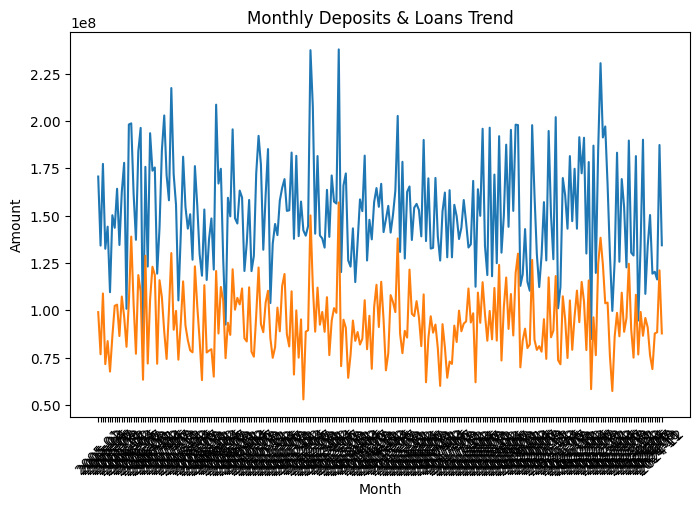

In [ ]:
#Monthly Revenue Trend (Loans + Deposits)
monthly_trend = df.groupby("YearMonth").agg(
    Monthly_Deposits=("Bank Deposits", "sum"),
    Monthly_Loans=("Bank Loans", "sum")
)

monthly_trend.index = monthly_trend.index.astype(str)

plt.figure(figsize=(8,5))
plt.plot(monthly_trend.index, monthly_trend["Monthly_Deposits"])
plt.plot(monthly_trend.index, monthly_trend["Monthly_Loans"])
plt.xticks(rotation=45)
plt.title("Monthly Deposits & Loans Trend")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.show()


In [ ]:
#State-wise Revenue Bar Chart
state_revenue = df.groupby("State").agg(
    Total_Deposits=("Bank Deposits", "sum"),
    Total_Loans=("Bank Loans", "sum"),
    Total_Business_Lending=("Business Lending", "sum")
)

state_revenue


,Total_Deposits,Total_Loans,Total_Business_Lending
State,,,
Delhi,5.339290e+09,3.280815e+09,3.895596e+09
Gujarat,5.244240e+09,3.171333e+09,3.858419e+09
Karnataka,5.324503e+09,3.344602e+09,3.971023e+09
Maharashtra,5.469949e+09,3.306488e+09,3.902336e+09
Tamil Nadu,4.976648e+09,3.130791e+09,3.820135e+09
Telangana,5.244996e+09,3.124087e+09,3.793945e+09
West Bengal,5.036906e+09,3.212200e+09,3.747017e+09


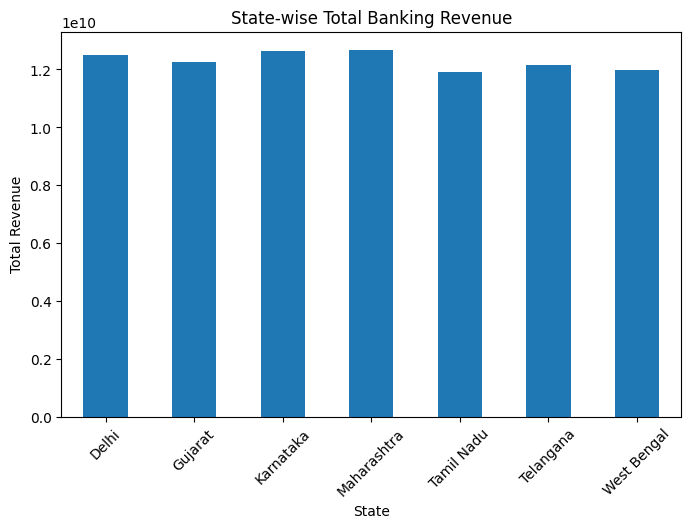

In [ ]:
plt.figure(figsize=(8,5))
state_revenue.sum(axis=1).plot(kind="bar")
plt.title("State-wise Total Banking Revenue")
plt.xlabel("State")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


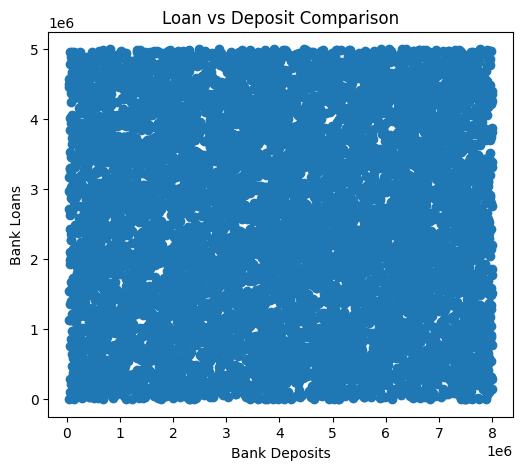

In [ ]:
#Loan vs Deposit Comparison
plt.figure(figsize=(6,5))
plt.scatter(df["Bank Deposits"], df["Bank Loans"])
plt.xlabel("Bank Deposits")
plt.ylabel("Bank Loans")
plt.title("Loan vs Deposit Comparison")
plt.show()


In [ ]:
#Revenue Contribution Table
revenue_summary = pd.DataFrame({
    "Revenue Source": [
        "Bank Deposits",
        "Bank Loans",
        "Business Lending",
        "Credit Card Outstanding"
    ],
    "Total Amount": [
        total_deposits,
        total_loans,
        total_business_lending,
        total_credit_card_outstanding
    ]
})

revenue_summary


,Revenue Source,Total Amount
0,Bank Deposits,3.663653e+10
1,Bank Loans,2.257032e+10
2,Business Lending,2.698847e+10
3,Credit Card Outstanding,6.746486e+08


In [ ]:
#6.Customer Profitability Dashboard

In [ ]:
#Feature Engineering (Value Metrics)
#Average Balance per Customer

df["Avg_Balance"] = (
    df["Bank Deposits"] +
    df["Saving Accounts"] +
    df["Checking Accounts"]
) / 3


In [ ]:
#Loan-to-Income Ratio
df["Loan_to_Income"] = df["Bank Loans"] / df["Estimated Income"]
df["Loan_to_Income"].replace([float("inf")], 0, inplace=True)


/tmp/ipython-input-1932677990.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Loan_to_Income"].replace([float("inf")], 0, inplace=True)


In [ ]:
#Total Deposits by Loyalty
loyalty_deposits = df.groupby("Loyalty Classification")["Bank Deposits"].sum()
loyalty_deposits


,Bank Deposits
Loyalty Classification,
Gold,9.746745e+09
Jade,9.447582e+09
Platinum,8.865369e+09
Silver,8.576836e+09


In [ ]:
#Loyalty-wise Profit (Proxy)
#Profit proxy = Deposits + Loans − Credit Card Balance

df["Profit_Score"] = (
    df["Bank Deposits"] +
    df["Bank Loans"] -
    df["Credit Card Balance"]
)

loyalty_profit = df.groupby("Loyalty Classification")["Profit_Score"].mean()


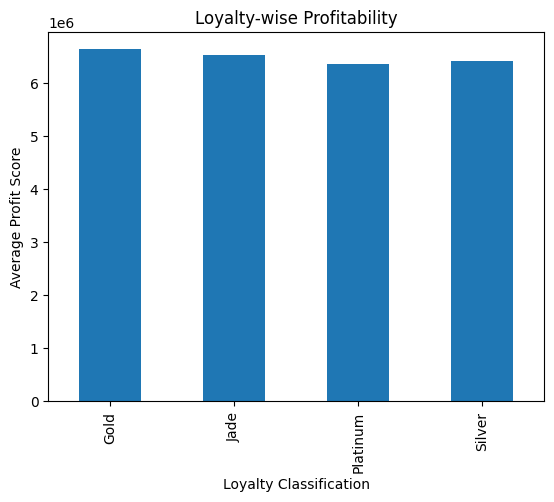

In [ ]:
plt.figure()
loyalty_profit.plot(kind="bar")
plt.title("Loyalty-wise Profitability")
plt.xlabel("Loyalty Classification")
plt.ylabel("Average Profit Score")
plt.show()


In [ ]:
#Top 10 High-Value Customers
top_customers = df.sort_values(
    by="Profit_Score",
    ascending=False
).head(10)

top_customers[
    ["Client ID", "State", "City", "Loyalty Classification",
     "Profit_Score", "Avg_Balance", "Loan_to_Income"]
]


,Client ID,State,City,Loyalty Classification,Profit_Score,Avg_Balance,Loan_to_Income
8176,IND18176,Gujarat,Surat,Gold,12875640.81,2.963369e+06,4.158494
2389,IND12389,Delhi,New Delhi,Platinum,12802121.17,3.775730e+06,9.760923
6575,IND16575,Karnataka,Mysuru,Gold,12798814.03,4.309923e+06,6.995689
7474,IND17474,Telangana,Hyderabad,Silver,12789013.64,3.374690e+06,4.457233
650,IND10650,West Bengal,Kolkata,Silver,12749657.95,3.488380e+06,7.345145
9818,IND19818,Telangana,Warangal,Silver,12735258.95,3.433351e+06,7.579247
9774,IND19774,Karnataka,Bengaluru,Platinum,12724204.18,4.114600e+06,5.982849
2503,IND12503,Gujarat,Surat,Silver,12707786.12,3.416528e+06,8.313265
7640,IND17640,Karnataka,Bengaluru,Platinum,12692267.49,3.409460e+06,19.811459
3380,IND13380,Tamil Nadu,Chennai,Jade,12665003.23,3.561620e+06,18.357745


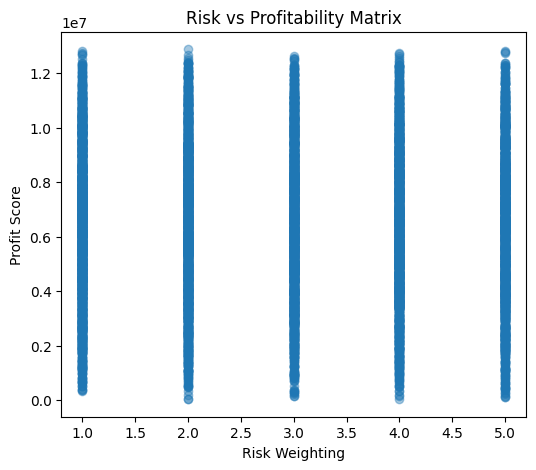

In [ ]:
#Risk vs Profitability Matrix
plt.figure(figsize=(6,5))
plt.scatter(
    df["Risk Weighting"],
    df["Profit_Score"],
    alpha=0.4
)
plt.xlabel("Risk Weighting")
plt.ylabel("Profit Score")
plt.title("Risk vs Profitability Matrix")
plt.show()


In [ ]:
#High-Value & Low-Risk Customers (Best Segment)
valuable_low_risk = df[
    (df["Profit_Score"] > df["Profit_Score"].quantile(0.75)) &
    (df["Risk Weighting"] < df["Risk Weighting"].quantile(0.25))
]

valuable_low_risk.shape


(455, 31)

In [ ]:
#Summary Table
summary = {
    "Avg Balance per Customer": df["Avg_Balance"].mean(),
    "Avg Loan-to-Income Ratio": df["Loan_to_Income"].mean(),
    "High-Value Low-Risk Customers": valuable_low_risk.shape[0]
}

summary


{'Avg Balance per Customer': np.float64(2524811.4207935277),
 'Avg Loan-to-Income Ratio': np.float64(4.095527935717251),
 'High-Value Low-Risk Customers': 455}

In [ ]:
#7.Risk Exposure & Credit Monitoring Dashboard


In [ ]:
#Define High-Risk Threshold
high_risk_threshold = df["Risk Weighting"].quantile(0.75)
high_risk_threshold


np.float64(4.0)

In [ ]:
#High-Risk Customer Count
high_risk_customers = df[df["Risk Weighting"] >= high_risk_threshold]

high_risk_customers.shape


(3594, 31)

In [ ]:
#Total Loan Exposure
total_loan_exposure = df["Bank Loans"].sum()
high_risk_loan_exposure = high_risk_customers["Bank Loans"].sum()

total_loan_exposure, high_risk_loan_exposure


(np.float64(22570315862.539997), np.float64(8872859863.76))

In [ ]:
#Average Credit Card Balance by Risk
avg_cc_by_risk = df.groupby("Risk Weighting")["Credit Card Balance"].mean()
avg_cc_by_risk


,Credit Card Balance
Risk Weighting,
1,74608.550150
2,74612.131030
3,74859.663189
4,76968.997134
5,72767.660510


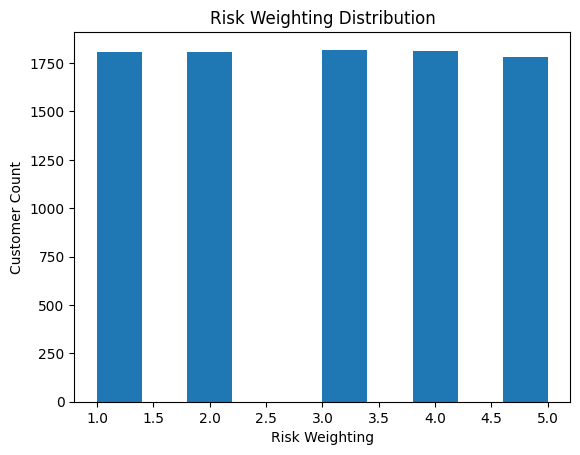

In [ ]:
#Risk Weighting Distribution (Histogram)
plt.figure()
plt.hist(df["Risk Weighting"])
plt.title("Risk Weighting Distribution")
plt.xlabel("Risk Weighting")
plt.ylabel("Customer Count")
plt.show()


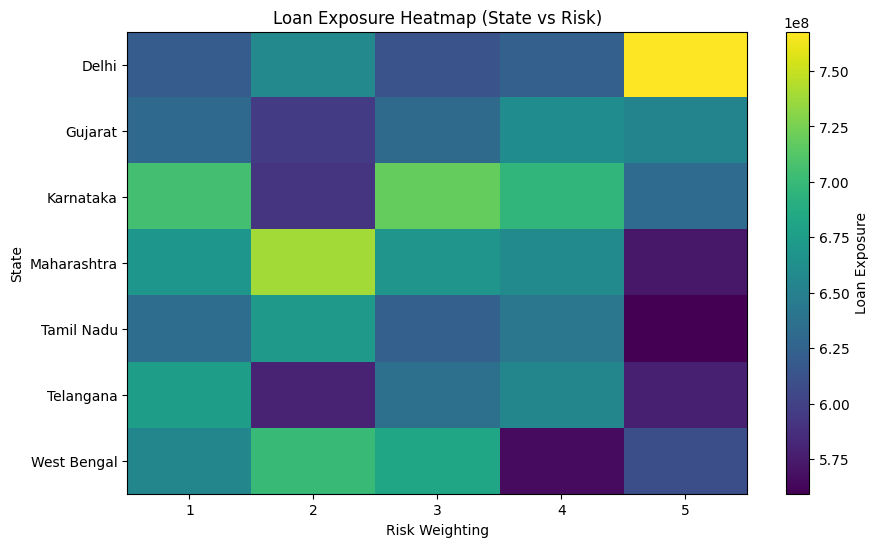

In [ ]:
#Loan Exposure Heatmap (Risk vs State)
loan_heatmap = df.pivot_table(
    values="Bank Loans",
    index="State",
    columns="Risk Weighting",
    aggfunc="sum",
    fill_value=0
)

plt.figure(figsize=(10,6))
plt.imshow(loan_heatmap, aspect="auto")
plt.colorbar(label="Loan Exposure")
plt.yticks(range(len(loan_heatmap.index)), loan_heatmap.index)
plt.xticks(range(len(loan_heatmap.columns)), loan_heatmap.columns)
plt.title("Loan Exposure Heatmap (State vs Risk)")
plt.xlabel("Risk Weighting")
plt.ylabel("State")
plt.show()


In [ ]:
#High-Risk Customer Table
high_risk_table = high_risk_customers[[
    "Client ID",
    "State",
    "City",
    "Estimated Income",
    "Bank Loans",
    "Credit Card Balance",
    "Risk Weighting"
]]

high_risk_table.head(10)


,Client ID,State,City,Estimated Income,Bank Loans,Credit Card Balance,Risk Weighting
3,IND10003,Karnataka,Bengaluru,451995.22,698151.60,21430.74,4
4,IND10004,Maharashtra,Mumbai,816094.01,4303898.51,145661.76,5
8,IND10008,Gujarat,Surat,640547.16,4920826.06,101004.68,4
9,IND10009,Karnataka,Mysuru,869537.65,4631834.92,145349.44,5
13,IND10013,Telangana,Hyderabad,824588.34,4264564.08,103124.57,4
14,IND10014,Telangana,Warangal,321481.67,4172975.10,81838.54,5
18,IND10018,Tamil Nadu,Madurai,559873.76,2102231.67,19093.17,4
19,IND10019,Delhi,New Delhi,875908.21,4092117.32,50278.24,5
23,IND10023,Tamil Nadu,Coimbatore,509288.55,3395709.43,50419.43,4
24,IND10024,Telangana,Warangal,681964.36,4756020.60,41738.49,5


In [ ]:
#Risk Summary
risk_summary = {
    "Total Customers": df.shape[0],
    "High-Risk Customers": high_risk_customers.shape[0],
    "Total Loan Exposure": total_loan_exposure,
    "High-Risk Loan Exposure": high_risk_loan_exposure
}

risk_summary


{'Total Customers': 9023,
 'High-Risk Customers': 3594,
 'Total Loan Exposure': np.float64(22570315862.539997),
 'High-Risk Loan Exposure': np.float64(8872859863.76)}

In [ ]:
#8.State & City Expansion Strategy Dashboard

In [ ]:
#City-wise Metrics (Branch Decision Factors)
city_metrics = df.groupby(["State", "City"]).agg(
    Customer_Density=("Client ID", "count"),
    Avg_Income=("Estimated Income", "mean"),
    Total_Deposits=("Bank Deposits", "sum")
).reset_index()

city_metrics.head()


,State,City,Customer_Density,Avg_Income,Total_Deposits
0,Delhi,New Delhi,1313,728922.761371,5.339290e+09
1,Gujarat,Ahmedabad,419,731267.461671,1.736354e+09
2,Gujarat,Surat,423,723046.243522,1.684831e+09
3,Gujarat,Vadodara,433,735476.705104,1.823054e+09
4,Karnataka,Bengaluru,470,713461.041255,1.845401e+09


In [ ]:
#City Ranking Table (Best for New Branches)
city_metrics["Branch_Score"] = (
    city_metrics["Customer_Density"] * 0.4 +
    city_metrics["Avg_Income"] * 0.3 +
    city_metrics["Total_Deposits"] * 0.3
)

top_cities = city_metrics.sort_values(
    by="Branch_Score",
    ascending=False
).head(10)

top_cities


,State,City,Customer_Density,Avg_Income,Total_Deposits,Branch_Score
0,Delhi,New Delhi,1313,728922.761371,5.339290e+09,1.602006e+09
13,Telangana,Hyderabad,640,736812.303750,2.642760e+09,7.930493e+08
14,Telangana,Warangal,636,723230.902626,2.602235e+09,7.808879e+08
16,West Bengal,Kolkata,642,727764.025483,2.601465e+09,7.806581e+08
15,West Bengal,Howrah,616,706661.363458,2.435440e+09,7.308444e+08
7,Maharashtra,Mumbai,466,700787.971137,1.917274e+09,5.753926e+08
5,Karnataka,Mangaluru,454,719438.738458,1.851964e+09,5.558053e+08
4,Karnataka,Bengaluru,470,713461.041255,1.845401e+09,5.538344e+08
3,Gujarat,Vadodara,433,735476.705104,1.823054e+09,5.471371e+08
9,Maharashtra,Pune,425,736395.971129,1.778218e+09,5.336864e+08


In [ ]:
#City Ranking Table (Clean View)
top_cities[[
    "State",
    "City",
    "Customer_Density",
    "Avg_Income",
    "Total_Deposits",
    "Branch_Score"
]]


,State,City,Customer_Density,Avg_Income,Total_Deposits,Branch_Score
0,Delhi,New Delhi,1313,728922.761371,5.339290e+09,1.602006e+09
13,Telangana,Hyderabad,640,736812.303750,2.642760e+09,7.930493e+08
14,Telangana,Warangal,636,723230.902626,2.602235e+09,7.808879e+08
16,West Bengal,Kolkata,642,727764.025483,2.601465e+09,7.806581e+08
15,West Bengal,Howrah,616,706661.363458,2.435440e+09,7.308444e+08
7,Maharashtra,Mumbai,466,700787.971137,1.917274e+09,5.753926e+08
5,Karnataka,Mangaluru,454,719438.738458,1.851964e+09,5.558053e+08
4,Karnataka,Bengaluru,470,713461.041255,1.845401e+09,5.538344e+08
3,Gujarat,Vadodara,433,735476.705104,1.823054e+09,5.471371e+08
9,Maharashtra,Pune,425,736395.971129,1.778218e+09,5.336864e+08


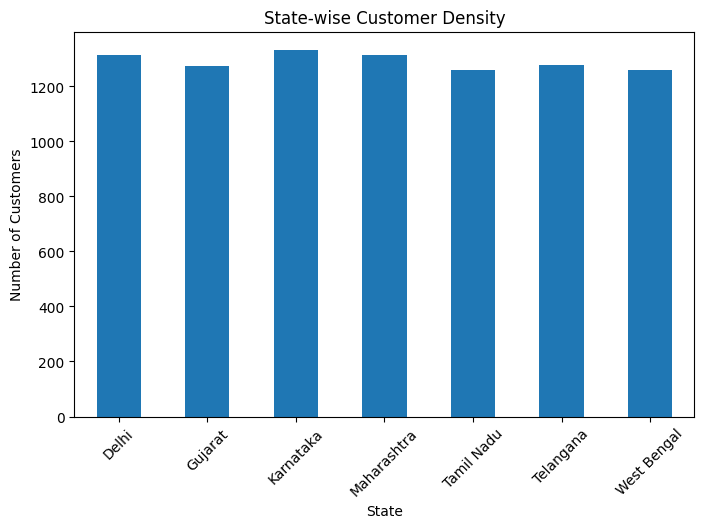

In [ ]:
#State-wise Performance (Customer Density)
state_customers = df.groupby("State")["Client ID"].count()

plt.figure(figsize=(8,5))
state_customers.plot(kind="bar")
plt.title("State-wise Customer Density")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


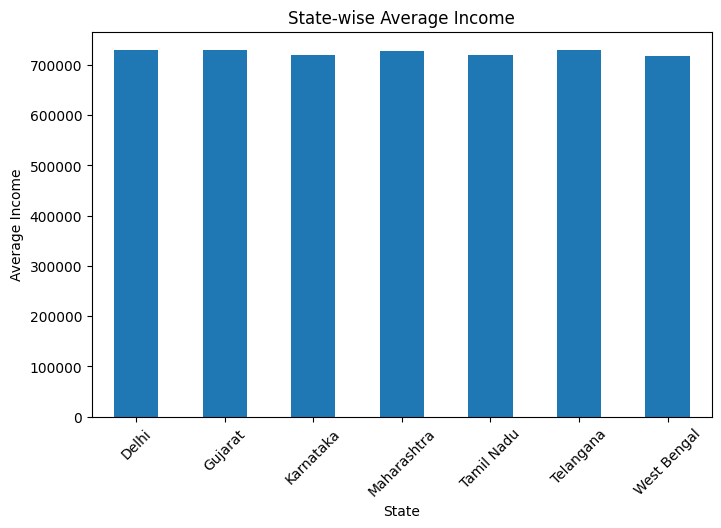

In [ ]:
#State-wise Average Income
state_income = df.groupby("State")["Estimated Income"].mean()

plt.figure(figsize=(8,5))
state_income.plot(kind="bar")
plt.title("State-wise Average Income")
plt.xlabel("State")
plt.ylabel("Average Income")
plt.xticks(rotation=45)
plt.show()


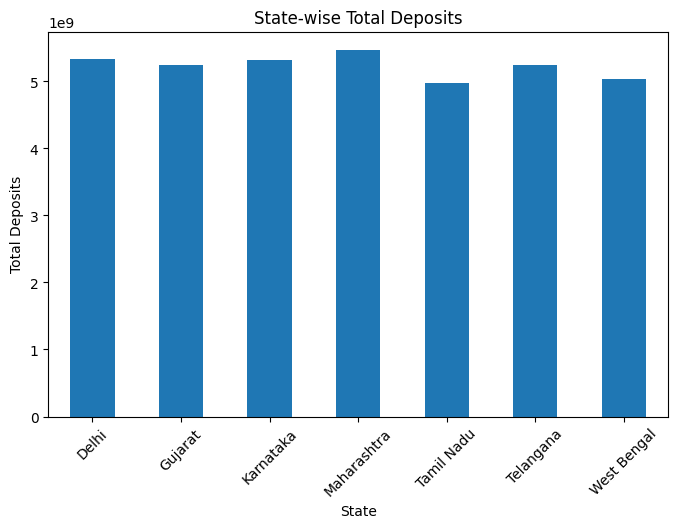

In [ ]:
#State-wise Deposits
state_deposits = df.groupby("State")["Bank Deposits"].sum()

plt.figure(figsize=(8,5))
state_deposits.plot(kind="bar")
plt.title("State-wise Total Deposits")
plt.xlabel("State")
plt.ylabel("Total Deposits")
plt.xticks(rotation=45)
plt.show()


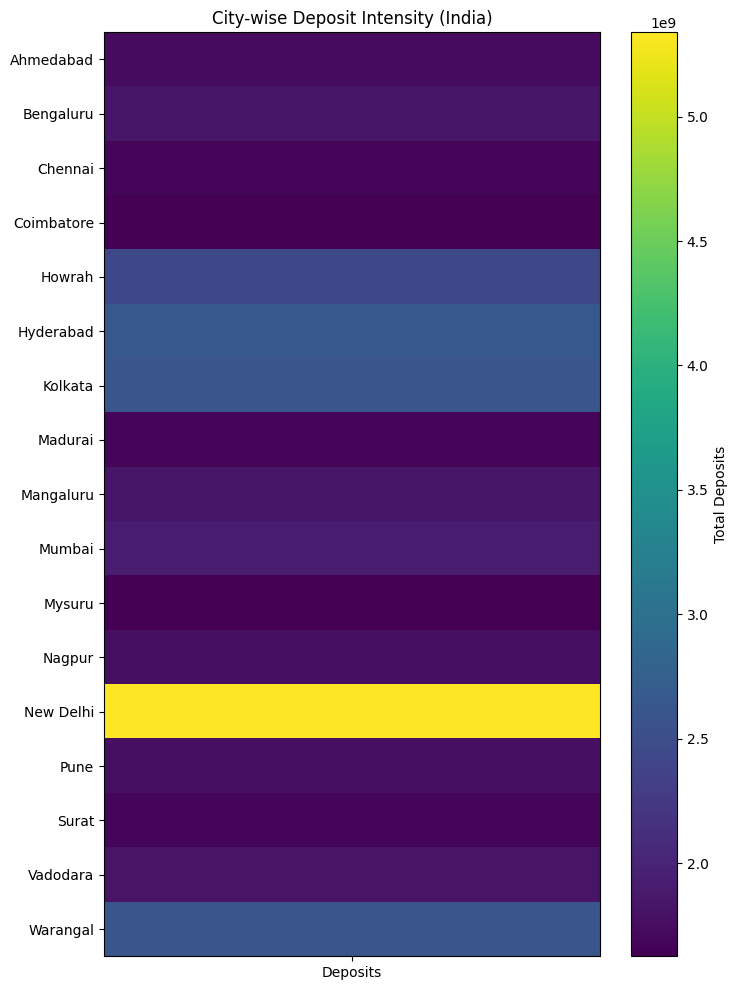

In [ ]:
#Heatmap – Deposits per City (India Overview)
city_deposit_heatmap = df.pivot_table(
    values="Bank Deposits",
    index="City",
    aggfunc="sum"
)

plt.figure(figsize=(8,12))
plt.imshow(city_deposit_heatmap, aspect="auto")
plt.colorbar(label="Total Deposits")
plt.yticks(range(len(city_deposit_heatmap.index)), city_deposit_heatmap.index)
plt.xticks([0], ["Deposits"])
plt.title("City-wise Deposit Intensity (India)")
plt.show()


In [ ]:
#Final Recommendation Summary
recommendation_summary = {
    "Best States (High Customers)": state_customers.sort_values(ascending=False).head(3).to_dict(),
    "Best Cities for New Branches": top_cities[["City", "State"]].to_dict(orient="records")
}

recommendation_summary


{'Best States (High Customers)': {'Karnataka': 1332,
  'Delhi': 1313,
  'Maharashtra': 1312},
 'Best Cities for New Branches': [{'City': 'New Delhi', 'State': 'Delhi'},
  {'City': 'Hyderabad', 'State': 'Telangana'},
  {'City': 'Warangal', 'State': 'Telangana'},
  {'City': 'Kolkata', 'State': 'West Bengal'},
  {'City': 'Howrah', 'State': 'West Bengal'},
  {'City': 'Mumbai', 'State': 'Maharashtra'},
  {'City': 'Mangaluru', 'State': 'Karnataka'},
  {'City': 'Bengaluru', 'State': 'Karnataka'},
  {'City': 'Vadodara', 'State': 'Gujarat'},
  {'City': 'Pune', 'State': 'Maharashtra'}]}

In [ ]:
#9. Customer Demographics & Behavior Dashboard

In [ ]:
#Create Age Buckets
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ["18–25", "26–35", "36–45", "46–55", "56–65", "65+"]

df["Age_Group"] = pd.cut(
    df["Age"],
    bins=age_bins,
    labels=age_labels,
    right=True
)

df["Age_Group"].value_counts()


,count
Age_Group,
18–25,2602
36–45,2601
26–35,2582
46–55,1238
56–65,0
65+,0


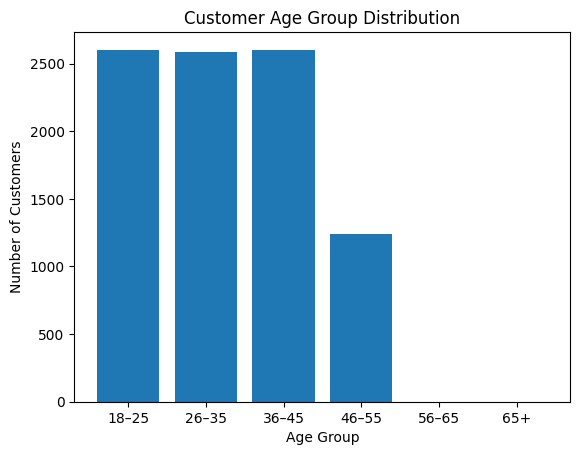

In [ ]:
#Age Group Distribution (Bar Chart)
age_dist = df["Age_Group"].value_counts().sort_index()

plt.figure()
plt.bar(age_dist.index, age_dist.values)
plt.title("Customer Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.show()


In [ ]:
#Gender Ratio
gender_counts = df["GenderId"].value_counts()
gender_counts


,count
GenderId,
2,4512
1,4511


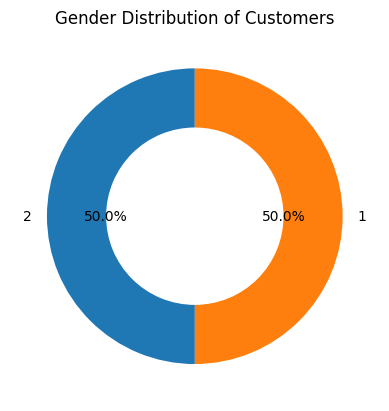

In [ ]:
#Gender Donut Chart
plt.figure()
plt.pie(
    gender_counts.values,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"width": 0.4}
)
plt.title("Gender Distribution of Customers")
plt.show()


In [ ]:
#Occupation Segments
occupation_counts = df["Occupation"].value_counts().head(10)
occupation_counts


,count
Occupation,
Network Engineer,991
System Administrator,981
Business Analyst,976
Data Analyst,955
Bank Officer,949
Support Engineer,941
IT Consultant,935
Accountant,922
Software Engineer,916


In [ ]:
#Occupation-wise Average Income
occupation_income = df.groupby("Occupation")["Estimated Income"].mean().sort_values(
    ascending=False
).head(10)

occupation_income


,Estimated Income
Occupation,
Accountant,744102.943698
Data Analyst,734176.757435
Support Engineer,732329.442104
Bank Officer,727741.820211
System Administrator,723474.823660
Network Engineer,723263.563602
Business Analyst,720345.033473
Unknown,717034.983654
Software Engineer,712617.161790


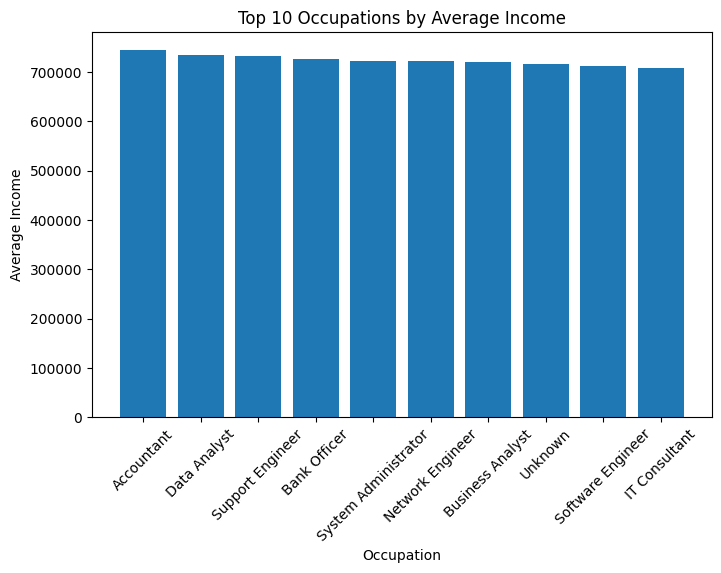

In [ ]:
#Occupation-wise Income (Bar Chart)
plt.figure(figsize=(8,5))
plt.bar(occupation_income.index, occupation_income.values)
plt.title("Top 10 Occupations by Average Income")
plt.xlabel("Occupation")
plt.ylabel("Average Income")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Demographic Summary Table
summary = {
    "Total Customers": df.shape[0],
    "Most Common Age Group": age_dist.idxmax(),
    "Major Gender Group": gender_counts.idxmax(),
    "Top Occupation": occupation_counts.idxmax()
}

summary


{'Total Customers': 9023,
 'Most Common Age Group': '18–25',
 'Major Gender Group': np.int64(2),
 'Top Occupation': 'Network Engineer'}

In [ ]:
#10.Executive Banking Overview Dashboard (CEO View)

In [ ]:
#Date Preparation (for Trends)
df["Joined Bank"] = pd.to_datetime(df["Joined Bank"], errors="coerce")
df["YearMonth"] = df["Joined Bank"].dt.to_period("M").astype(str)


In [ ]:
#KPI Calculations (Bank Health)
total_customers = df.shape[0]
total_deposits = df["Bank Deposits"].sum()
total_loans = df["Bank Loans"].sum()

# Risk ratio = High-risk customers / Total customers
high_risk_threshold = df["Risk Weighting"].quantile(0.75)
high_risk_customers = df[df["Risk Weighting"] >= high_risk_threshold]
risk_ratio = high_risk_customers.shape[0] / total_customers

total_customers, total_deposits, total_loans, risk_ratio


(9023,
 np.float64(36636531625.63),
 np.float64(22570315862.539997),
 0.3983154161587055)

In [ ]:
#KPI Cards (Text-Based – 1 Page Feel)
print("🏦 BANK HEALTH SNAPSHOT")
print("-----------------------")
print(f"Total Customers      : {total_customers:,}")
print(f"Total Deposits       : ₹{total_deposits:,.2f}")
print(f"Loan Exposure        : ₹{total_loans:,.2f}")
print(f"Risk Ratio           : {risk_ratio:.2%}")


🏦 BANK HEALTH SNAPSHOT
-----------------------
Total Customers      : 9,023
Total Deposits       : ₹36,636,531,625.63
Loan Exposure        : ₹22,570,315,862.54
Risk Ratio           : 39.83%


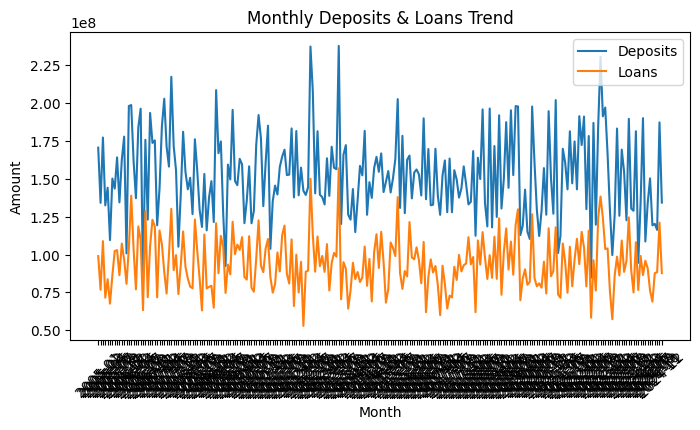

In [ ]:
#Trend Lines (Deposits & Loans Over Time)
monthly_trend = df.groupby("YearMonth").agg(
    Deposits=("Bank Deposits", "sum"),
    Loans=("Bank Loans", "sum")
)

plt.figure(figsize=(8,4))
plt.plot(monthly_trend.index, monthly_trend["Deposits"], label="Deposits")
plt.plot(monthly_trend.index, monthly_trend["Loans"], label="Loans")
plt.xticks(rotation=45)
plt.title("Monthly Deposits & Loans Trend")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.legend()
plt.show()


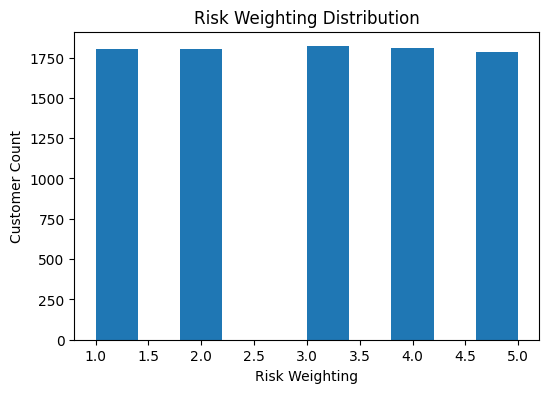

In [ ]:
#Risk Indicator – Risk Weighting Distribution
plt.figure(figsize=(6,4))
plt.hist(df["Risk Weighting"])
plt.title("Risk Weighting Distribution")
plt.xlabel("Risk Weighting")
plt.ylabel("Customer Count")
plt.show()


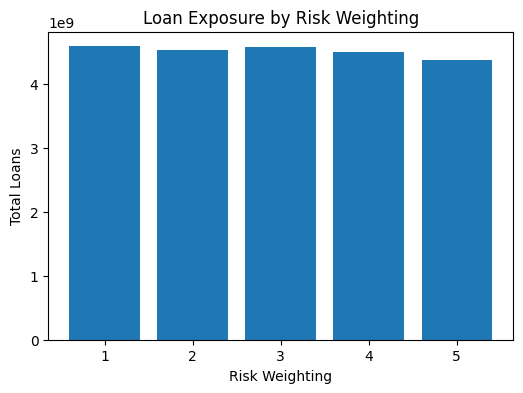

In [ ]:
#Risk Indicator – Loan Exposure by Risk
loan_by_risk = df.groupby("Risk Weighting")["Bank Loans"].sum()

plt.figure(figsize=(6,4))
plt.bar(loan_by_risk.index, loan_by_risk.values)
plt.title("Loan Exposure by Risk Weighting")
plt.xlabel("Risk Weighting")
plt.ylabel("Total Loans")
plt.show()


In [ ]:
#High-Risk Exposure Summary Table
risk_summary = pd.DataFrame({
    "Metric": [
        "Total Customers",
        "High-Risk Customers",
        "Total Loan Exposure",
        "High-Risk Loan Exposure"
    ],
    "Value": [
        total_customers,
        high_risk_customers.shape[0],
        total_loans,
        high_risk_customers["Bank Loans"].sum()
    ]
})

risk_summary


,Metric,Value
0,Total Customers,9.023000e+03
1,High-Risk Customers,3.594000e+03
2,Total Loan Exposure,2.257032e+10
3,High-Risk Loan Exposure,8.872860e+09


In [ ]:
#1-Page Bank Health Verdict
verdict = {
    "Customer Base": "Strong" if total_customers > 8000 else "Moderate",
    "Liquidity (Deposits)": "Healthy" if total_deposits > total_loans else "Watch",
    "Risk Level": "Manageable" if risk_ratio < 0.30 else "High"
}

verdict


{'Customer Base': 'Strong',
 'Liquidity (Deposits)': 'Healthy',
 'Risk Level': 'High'}

In [ ]:
#11.Data Quality Monitoring Dashboard

In [ ]:
#_% NULL Values per Column
null_counts = df.isnull().sum()
null_percent = (null_counts / len(df)) * 100

null_summary = pd.DataFrame({
    "Null_Count": null_counts,
    "Null_Percentage": null_percent
})

null_summary


,Null_Count,Null_Percentage
Client ID,0,0.0
Name,0,0.0
Age,0,0.0
State,0,0.0
City,0,0.0
Location ID,0,0.0
Joined Bank,0,0.0
Banking Contact,0,0.0
Nationality,0,0.0
Occupation,0,0.0


In [ ]:
#Duplicate Record Count
duplicate_count = df.duplicated().sum()
duplicate_count


np.int64(0)

In [ ]:
#Identify Invalid Records
#Rules
#Age < 18 or Age > 100
#Negative financial values
invalid_age = df[(df["Age"] < 18) | (df["Age"] > 100)]

financial_columns = [
    "Estimated Income",
    "Bank Deposits",
    "Bank Loans",
    "Credit Card Balance",
    "Business Lending"
]

invalid_financial = df[(df[financial_columns] < 0).any(axis=1)]

invalid_age.shape, invalid_financial.shape


((0, 32), (0, 32))

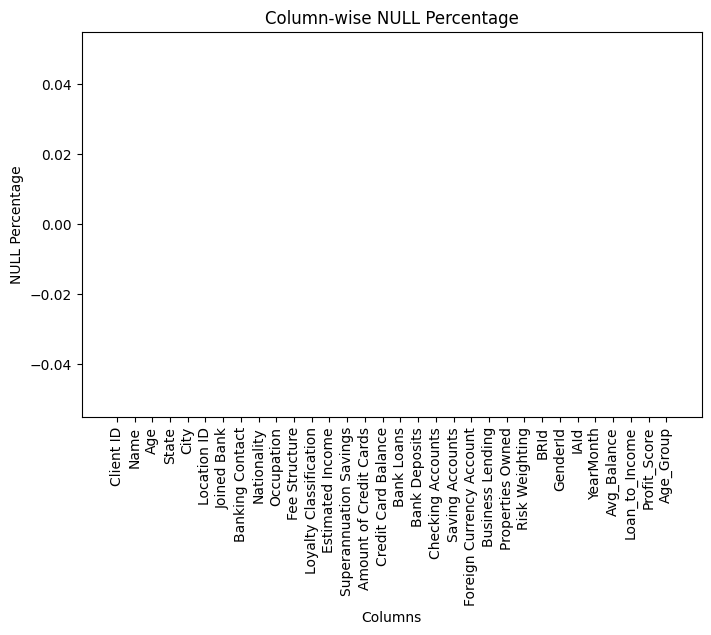

In [ ]:
#Column-wise NULL Bar Chart
null_percent_sorted = null_percent.sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.bar(null_percent_sorted.index, null_percent_sorted.values)
plt.title("Column-wise NULL Percentage")
plt.xlabel("Columns")
plt.ylabel("NULL Percentage")
plt.xticks(rotation=90)
plt.show()


In [ ]:
#Data Quality Scorecard
null_penalty = null_percent.mean()
duplicate_penalty = (duplicate_count / len(df)) * 100 * 5
invalid_penalty = 10 if (len(invalid_age) > 0 or len(invalid_financial) > 0) else 0

data_quality_score = 100 - null_penalty - duplicate_penalty - invalid_penalty
data_quality_score


np.float64(100.0)

In [ ]:
#Data Quality Scorecard Table
quality_scorecard = pd.DataFrame({
    "Metric": [
        "Average NULL %",
        "Duplicate %",
        "Invalid Records Found",
        "Overall Data Quality Score"
    ],
    "Value": [
        round(null_penalty, 2),
        round((duplicate_count / len(df)) * 100, 2),
        "Yes" if invalid_penalty > 0 else "No",
        round(data_quality_score, 2)
    ]
})

quality_scorecard


,Metric,Value
0,Average NULL %,0.0
1,Duplicate %,0.0
2,Invalid Records Found,No
3,Overall Data Quality Score,100.0


In [ ]:
#Data Cleanliness Verdict
verdict = "Excellent" if data_quality_score >= 85 else \
          "Good" if data_quality_score >= 70 else \
          "Needs Improvement"

verdict


'Excellent'

In [ ]:
#12. Gender-based Financial Behavior Analysis

In [ ]:
#Average Income by Gender
avg_income_gender = df.groupby("GenderId")["Estimated Income"].mean()
avg_income_gender


,Estimated Income
GenderId,
1,721015.699468
2,728442.538805


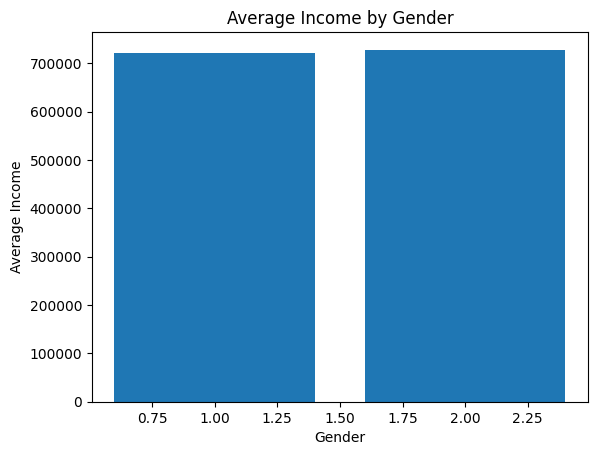

In [ ]:
#Bar Chart – Average Income by Gender
plt.figure()
plt.bar(avg_income_gender.index, avg_income_gender.values)
plt.title("Average Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Income")
plt.show()


In [ ]:
#Average Loans & Savings by Gender
df["Total_Savings"] = df["Saving Accounts"] + df["Checking Accounts"]


In [ ]:
gender_financials = df.groupby("GenderId").agg(
    Avg_Loans=("Bank Loans", "mean"),
    Avg_Savings=("Total_Savings", "mean")
)

gender_financials


,Avg_Loans,Avg_Savings
GenderId,,
1,2.506089e+06,3.520463e+06
2,2.496753e+06,3.507709e+06


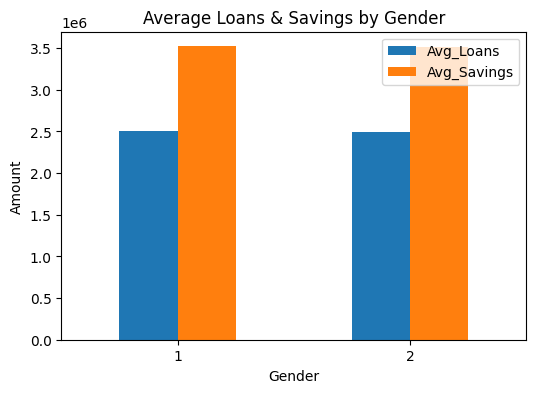

In [ ]:
#Loans vs Savings (Gender Comparison)
gender_financials.plot(kind="bar", figsize=(6,4))
plt.title("Average Loans & Savings by Gender")
plt.xlabel("Gender")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()


In [ ]:
#Credit Card Usage by Gender
avg_cc_gender = df.groupby("GenderId")["Credit Card Balance"].mean()
avg_cc_gender


,Credit Card Balance
GenderId,
1,74463.379829
2,75076.317145


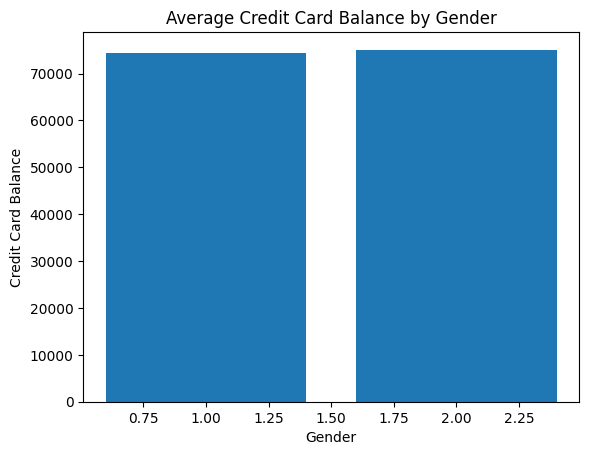

In [ ]:
#Credit Card Usage Bar Chart
plt.figure()
plt.bar(avg_cc_gender.index, avg_cc_gender.values)
plt.title("Average Credit Card Balance by Gender")
plt.xlabel("Gender")
plt.ylabel("Credit Card Balance")
plt.show()


In [ ]:
#Gender Behavior Summary Table
summary = pd.DataFrame({
    "Avg Income": avg_income_gender,
    "Avg Loans": gender_financials["Avg_Loans"],
    "Avg Savings": gender_financials["Avg_Savings"],
    "Avg Credit Card Balance": avg_cc_gender
})

summary


,Avg Income,Avg Loans,Avg Savings,Avg Credit Card Balance
GenderId,,,,
1,721015.699468,2.506089e+06,3.520463e+06,74463.379829
2,728442.538805,2.496753e+06,3.507709e+06,75076.317145


In [ ]:
#Simple Insight Flags
insights = {
    "Higher Avg Income Gender": avg_income_gender.idxmax(),
    "Higher Avg Loans Gender": gender_financials["Avg_Loans"].idxmax(),
    "Higher Avg Savings Gender": gender_financials["Avg_Savings"].idxmax(),
    "Higher Credit Card Usage Gender": avg_cc_gender.idxmax()
}

insights


{'Higher Avg Income Gender': np.int64(2),
 'Higher Avg Loans Gender': np.int64(1),
 'Higher Avg Savings Gender': np.int64(1),
 'Higher Credit Card Usage Gender': np.int64(2)}